In [4]:
import os
import pandas as pd
from utils.DataProcess import Start

In [51]:
data = Start('HL_14')

In [52]:
cols = [
#  'OA_TT1',
#  'OA_MT1',
 'Enthalpy',
#  'OA_TT2',
#  'OA_MT2',
#  'OA_E2',
#  'CHP_PDTA',
#  'CHP_PDTB',
#  'CHP_FT',
#  'chiller_RT',
#  'CHP_PDT_PV',
#  'CHP_VFD_OUT',
#  'chiller_supply_temp',
#  'chiller_return_temp',
#  'CWP_FT',
#  'CT_TDT_PV',
#  'CT_VFD_OUT',
 'condenser_supply_temp',
#  'condenser_return_temp',
#  'condenser_return_temp',
#  'CT_IN_TTB',
#  'CWP_TDT_PV',
#  'CWP_VFD_OUT',
#  'CT_WDT_A',
 'Wet_bulb_temp',
 'condenser_temp_diff',
 'loading',
 'Approach',
 'CT_eff',
 'CT_Total_KW',
 'CWP_Total_KW',
 'chiller_kwh'
 ]

In [53]:
# pd.DataFrame(df[cols].isna().sum(axis=0)).sort_values(0,ascending=False)

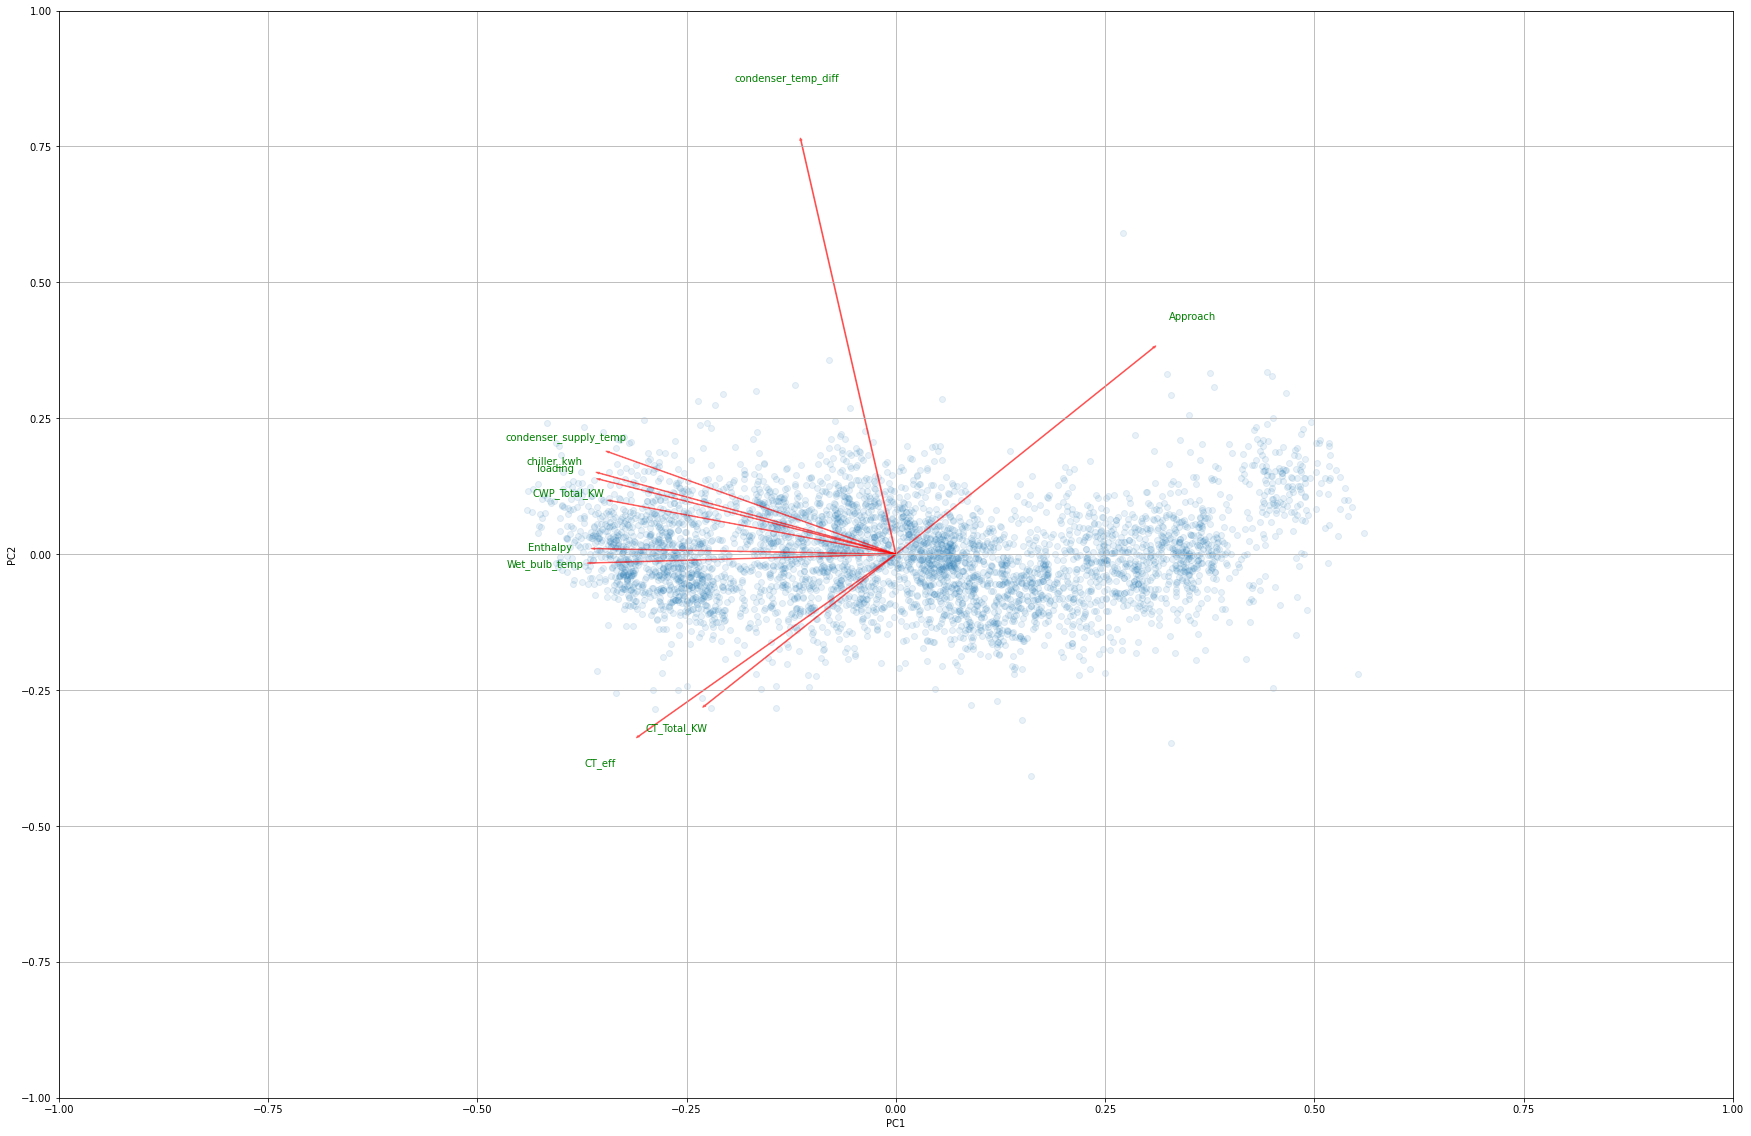

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(30,20))
# iris = datasets.load_iris()
X = data[cols].dropna()
# y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=cols):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,alpha=0.1)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

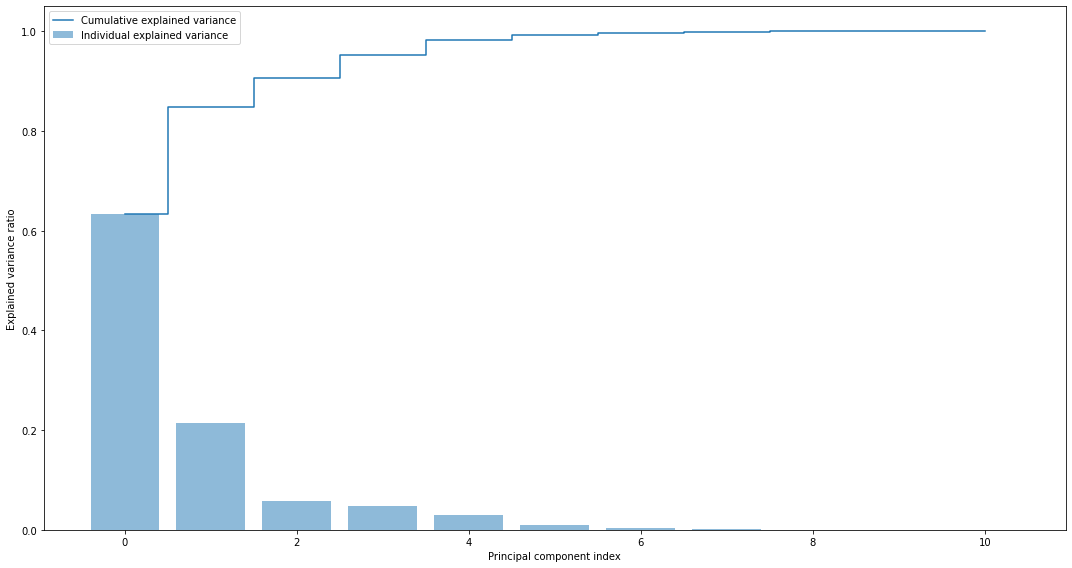

In [46]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
plt.figure(figsize=(15,8))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()